In [1]:
!pip install numpy pillow tensorflow scikit-learn


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)


In [3]:
import tensorflow as tf
print(tf.__version__)



2.18.0


In [155]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import LabelEncoder

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images
y = lfw_people.target

# Add a channel dimension (grayscale images have 1 channel)
X = X[..., np.newaxis]  # Shape becomes (n_samples, height, width, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),  # Input layer with 4D shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(lfw_people.target_names), activation='softmax')  # Output layer (number of classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size= 32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc}")


Epoch 1/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3545 - loss: 1.7925 - val_accuracy: 0.4534 - val_loss: 1.6093
Epoch 2/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4095 - loss: 1.7335 - val_accuracy: 0.4534 - val_loss: 1.6044
Epoch 3/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4028 - loss: 1.6841 - val_accuracy: 0.4534 - val_loss: 1.5389
Epoch 4/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4012 - loss: 1.6095 - val_accuracy: 0.4720 - val_loss: 1.4541
Epoch 5/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4632 - loss: 1.5090 - val_accuracy: 0.5559 - val_loss: 1.3719
Epoch 6/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5186 - loss: 1.3722 - val_accuracy: 0.6366 - val_loss: 1.1194
Epoch 7/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6544 - loss: 1.0093 - val_accuracy: 0.6863 - val_loss: 0.9812
Epoch 8/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7101 - loss: 0.7965 - val_accuracy: 0.7640 - v

Random Image shape: (50, 37, 1)


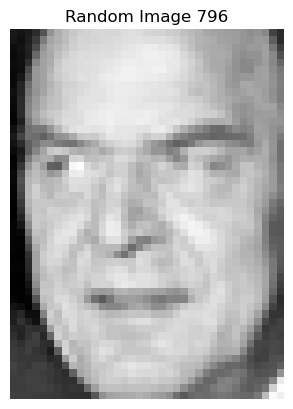

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Actual Name: Gerhard Schroeder
Predicted Name: Gerhard Schroeder


In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Function to preprocess a random image and predict
def preprocess_and_predict_random_image(model, X, y, target_names):
    """
    Preprocess a random image from the dataset and predict its class using the trained model.
    """
    # Choose a random image from the dataset
    random_idx = np.random.randint(0, X.shape[0])  # Randomly choose an image index
    random_image = X[random_idx]  # Randomly chosen image (grayscale, shape: (height, width, 1))

    # Check the shape of the random image
    print(f"Random Image shape: {random_image.shape}")  # Expected shape (height, width, 1)

    # Display the original image
    plt.imshow(random_image.squeeze(), cmap='gray')  # Squeeze to remove the single channel dimension
    plt.axis('off')  # Hide axes
    plt.title(f"Random Image {random_idx}")  # Optionally, show the index of the image
    plt.show()

    # Expand dimensions to create a batch of size 1 (required by the model)
    random_image_expanded = np.expand_dims(random_image, axis=0)  # Shape becomes (1, height, width, 1)

    # Predict the class of the random image
    y_pred = model.predict(random_image_expanded)
    predicted_class = np.argmax(y_pred, axis=1)[0]  # Get the index of the highest probability class

    # Get the actual and predicted class names
    actual_name = target_names[y[random_idx]]  # Map the actual index to the class name
    predicted_name = target_names[predicted_class]  # Map the predicted index to the class name

    # Print the actual and predicted names
    print(f"Actual Name: {actual_name}")
    print(f"Predicted Name: {predicted_name}")

# Call the function with the trained CNN model
preprocess_and_predict_random_image(model, X, y, lfw_people.target_names)


In [189]:
# Save the trained model
model.save("lfw_cnn_model.h5")  # Saves the model in HDF5 format
print("Model saved successfully.")


Model saved successfully.
